Testing a pretrained image classification model

In [1]:
import timm
import torch
from pprint import pprint
import requests
from PIL import Image
from io import BytesIO

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
imgpath = 'C:\Users\sasui\Pictures\Saved Pictures\elephant.jpg'
image = Image.open(imgpath)
image

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3538633439.py, line 1)

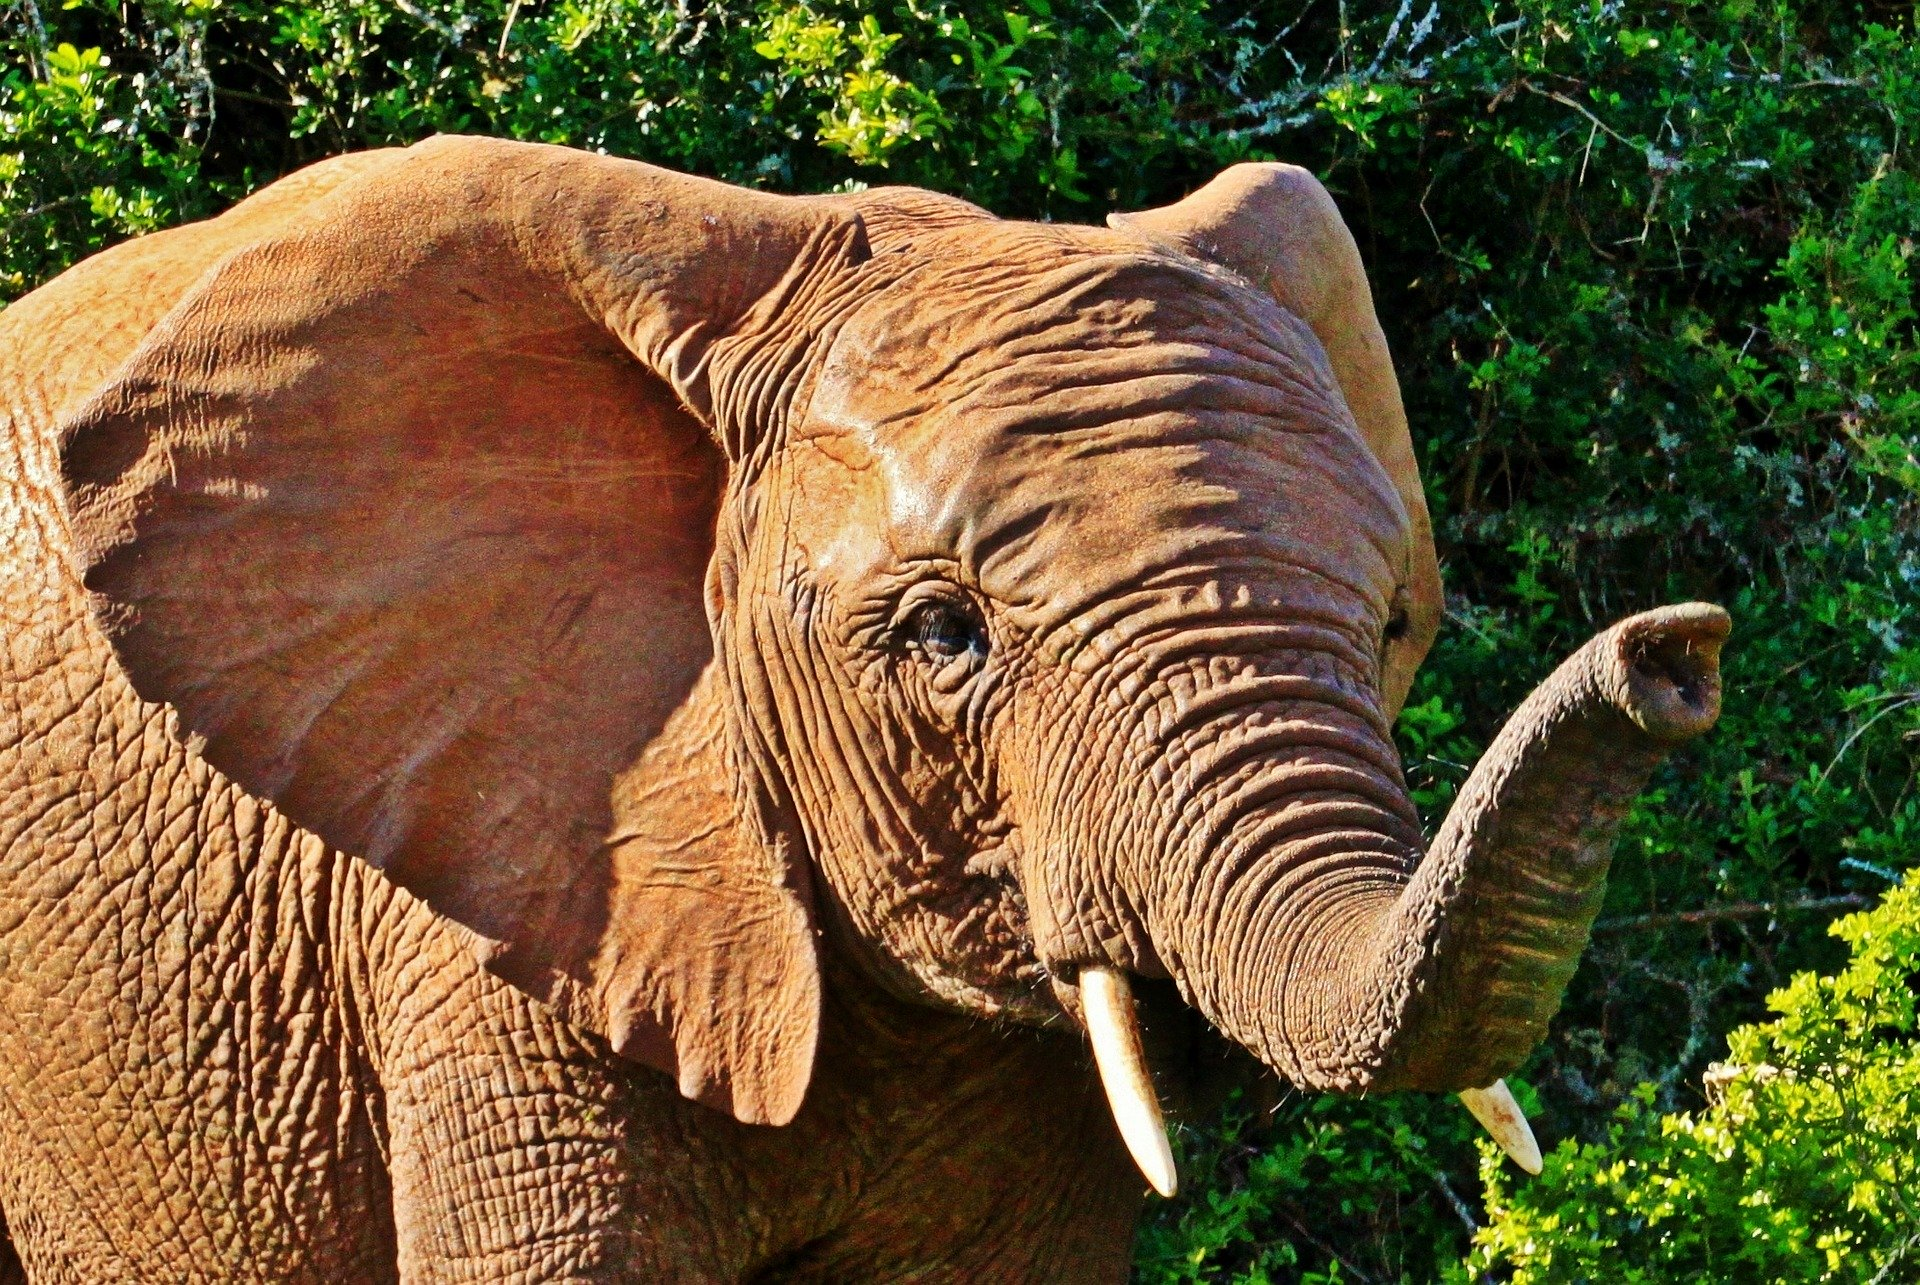

In [10]:
imgpath = 'C:/Users/sasui/Pictures/saved Pictures/elephant.jpg'
image = Image.open(imgpath)
image

We feed the model information to the transform so that it can make our images compatable with the model

In [11]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True).eval()

transform = timm.data.create_transform(
    **timm.data.resolve_data_config(model.pretrained_cfg)
)

In [12]:
image_tensor = transform(image)

image_tensor.shape

torch.Size([3, 224, 224])

In [13]:
output = model(image_tensor.unsqueeze(0))

output.shape

torch.Size([1, 1000])

In [14]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)

probabilities.shape

torch.Size([1000])

In [15]:
values, indices = torch.topk(probabilities, 5)

indices

tensor([386, 101, 385, 340, 292])

In [16]:
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'

IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')

[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

[{'label': 'African_elephant, Loxodonta_africana',
  'value': 0.8045634627342224},
 {'label': 'tusker', 'value': 0.04688449949026108},
 {'label': 'Indian_elephant, Elephas_maximus', 'value': 0.008631672710180283},
 {'label': 'zebra', 'value': 0.003176179714500904},
 {'label': 'tiger, Panthera_tigris', 'value': 0.002177715301513672}]